<a href="https://colab.research.google.com/github/AngelGui/Pandas_learining/blob/main/8_%E9%87%91%E8%9E%8D%E6%95%B0%E6%8D%AE%E4%B8%8E%E6%97%B6%E9%97%B4%E5%A4%84%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pandas 进阶修炼 ｜早起Python
<br>

**本习题由公众号【早起Python & 可视化图鉴】 原创，转载及其他形式合作请与我们联系（微信号`sshs321`)，未经授权严禁搬运及二次创作，侵权必究！**



本习题基于 `pandas` 版本 `1.1.3`，所有内容应当在 `Jupyter Notebook` 中执行以获得最佳效果。


不同版本之间写法可能会有少许不同，如若碰到此情况，你应该学会如何自行检索解决。

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 8 - 金融数据与时间处理



<br>

**<font color = '#5172F0'><font size=3.5>必读👇👇👇**</font>
    

有关于 pandas 的常用操作，在前面几个章节已经基本介绍完毕。
    
但是在利用 pandas 进行数据分析时，一个很重要的操作就是与带有时间属性的数据进行交互。
    
并且常常与股票、基金、数字货币等数据相关。
    
因此，本章是一个专题练习，将介绍
- pandas操作时间
- 股票数据分析
- k线图制作



## 初始化

<br>

该 `Notebook` 版本为**纯习题版**

如果需要答案或者提示，可以微信搜索公众号「早起Python」获取！

## 8-1 pandas中的时间操作

### 1 - 时间生成｜当前时间

使用 pandas 获取当前时间


In [138]:
import pandas as pd
pd.Timestamp('now')

Timestamp('2023-07-02 03:03:30.654020')

### 2 - 时间生成｜指定范围

使用 pandas 按天生成 2021年1月1日 至 2021年9月1日的全部日期

In [139]:
pd.date_range('1/1/2021','9/1/2021')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-28', '2021-08-29', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', length=244, freq='D')

### 3 - 时间生成｜指定长度

使用 pandas 从 2021年1月1日开始，按天生成 10 天日期

In [140]:
pd.date_range('1/1/2021', periods=10)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10'],
              dtype='datetime64[ns]', freq='D')

### 4 - 时间生成｜指定频率

使用 pandas 从 2021年1月1日开始，按周生成 7 周日期

In [141]:
pd.date_range('1/1/2021', periods=7, freq='W')

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14'],
              dtype='datetime64[ns]', freq='W-SUN')

### 5 - 时间生成｜特殊规律

使用 pandas 按天生成 2021年1月1日 至 2021年9月1日的全部**工作日**日期

In [142]:
pd.bdate_range(start='1/1/2021', end='9/1/2021')


DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', length=174, freq='B')

### 6 - 时间计算｜时间差（天）

使用 pandas 计算 2021年2月14日 距离今天相差多少天

In [143]:
(pd.Timestamp('now') - pd.to_datetime('2/14/2021')).days

868

### 7 - 时间计算｜时间差（小时）

使用 pandas 计算 2021年9月1日13点14分 距离今天相差多少小时

In [144]:
import numpy as np
(pd.Timestamp('now') - pd.to_datetime('9/1/2021 13:14:00'))/np.timedelta64(1, 'h')

16045.825205856667

In [145]:
(pd.Timestamp('now') - pd.to_datetime('2021-09-01 13:14:00'))/np.timedelta64(1, 'h')


16045.825209250277

### 8 - 时间运算

将第一题得到的时间减去一天

In [146]:
pd.Timestamp('now')- pd.to_timedelta('1 day')


Timestamp('2023-07-01 03:03:30.765025')

### 9 - 时间格式化

将上一题的结果式化为 xx年xx月xx日-xx时xx分xx秒

In [147]:
(pd.Timestamp('now') - pd.to_timedelta('1 day')).strftime("%Y年%m月%d日-%H时%M分%S秒")


'2023年07月01日-03时03分30秒'

## 8-2 股票数据分析

### 10 - 加载数据

本小节的数据将通过 [akshare](https://www.akshare.xyz/data/stock/stock.html#id8) 获取

如果你的电脑上未安装 akshare，可以执行下方代码进行安装

In [148]:
! pip install akshare

In [149]:
import pandas as pd
import akshare as ak

如果任何原因安装、导入失败，可以取消下方代码的注释，从本地读取数据

In [150]:
# 日线
df1 = ak.stock_zh_a_hist(symbol="000001", period="daily", start_date="20170101", end_date='20210914', adjust="qfq")
# df1 = pd.read_csv("000001_daily.csv")
# 5min
# df2 = ak.stock_zh_a_hist_min_em(symbol="000001", period='5', adjust='qfq', start_date="2021-08-01 09:32:00", end_date="2021-09-14 09:32:00")
path  = '/content/drive/MyDrive/Pandas_Advanced_Exercise-main/8 - 金融数据与时间处理/000001_5min.csv'
df2 = pd.read_csv(path)

### 11 - 查看数据类型

查看 df1 各列的数据类型

In [151]:
df1.head()

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2017-01-03,7.76,7.81,7.83,7.74,459840,420595184.0,1.16,0.77,0.06,0.31
1,2017-01-04,7.80,7.81,7.83,7.79,449330,411503440.0,0.51,0.00,0.00,0.31
2,2017-01-05,7.82,7.82,7.83,7.80,344373,315769696.0,0.38,0.13,0.01,0.24
3,2017-01-06,7.82,7.78,7.82,7.76,358154,327176432.0,0.77,-0.51,-0.04,0.24
4,2017-01-09,7.78,7.80,7.82,7.76,361082,329994608.0,0.77,0.26,0.02,0.21


In [152]:
df2.head()

,时间,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
0,2021/8/3 9:35,17.99,17.78,18.02,17.75,-1.28,-0.23,52807,94339287,1.50,0.03
1,2021/8/3 9:40,17.77,17.76,17.83,17.66,-0.11,-0.02,41508,73683531,0.96,0.02
2,2021/8/3 9:45,17.77,17.77,17.83,17.73,0.06,0.01,18521,32915794,0.56,0.01
3,2021/8/3 9:50,17.77,17.72,17.78,17.70,-0.28,-0.05,24424,43323693,0.45,0.01
4,2021/8/3 9:55,17.71,17.77,17.78,17.70,0.28,0.05,23197,41110937,0.45,0.01


### 12 - 时间类型转换

将 df1 和 df2 的 日期 列转换为 pandas 支持的时间格式

In [153]:
# df1['日期'].to_datetime()
# df1

In [154]:
df1['日期'] = pd.to_datetime(df1['日期'])
df1

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2017-01-03,7.76,7.81,7.83,7.74,459840,4.205952e+08,1.16,0.77,0.06,0.31
1,2017-01-04,7.80,7.81,7.83,7.79,449330,4.115034e+08,0.51,0.00,0.00,0.31
2,2017-01-05,7.82,7.82,7.83,7.80,344373,3.157697e+08,0.38,0.13,0.01,0.24
3,2017-01-06,7.82,7.78,7.82,7.76,358154,3.271764e+08,0.77,-0.51,-0.04,0.24
4,2017-01-09,7.78,7.80,7.82,7.76,361082,3.299946e+08,0.77,0.26,0.02,0.21
...,...,...,...,...,...,...,...,...,...,...,...
1141,2021-09-08,18.73,18.72,19.04,18.59,1026201,1.979771e+09,2.40,-0.05,-0.01,0.53
1142,2021-09-09,18.60,18.49,18.64,18.29,739506,1.399536e+09,1.87,-1.23,-0.23,0.38
1143,2021-09-10,18.38,20.06,20.26,18.33,2314945,4.668362e+09,10.44,8.49,1.57,1.19
1144,2021-09-13,19.85,19.70,20.00,19.30,1297228,2.606152e+09,3.49,-1.79,-0.36,0.67


In [155]:
df2['时间'] = pd.to_datetime(df2['时间'])
df2.head()

,时间,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
0,2021-08-03 09:35:00,17.99,17.78,18.02,17.75,-1.28,-0.23,52807,94339287,1.50,0.03
1,2021-08-03 09:40:00,17.77,17.76,17.83,17.66,-0.11,-0.02,41508,73683531,0.96,0.02
2,2021-08-03 09:45:00,17.77,17.77,17.83,17.73,0.06,0.01,18521,32915794,0.56,0.01
3,2021-08-03 09:50:00,17.77,17.72,17.78,17.70,-0.28,-0.05,24424,43323693,0.45,0.01
4,2021-08-03 09:55:00,17.71,17.77,17.78,17.70,0.28,0.05,23197,41110937,0.45,0.01


### 13 - 日期筛选｜区间

筛选出 df2 时间在 `2021-08-03 09:35:00` 与 `2021-08-04 15:00:00` 之间的数据

In [156]:
df2[(df2['时间'] > '2021-08-03 09:35:00') & (df2['时间'] < '2021-08-04 15:00:00')]

,时间,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
1,2021-08-03 09:40:00,17.77,17.76,17.83,17.66,-0.11,-0.02,41508,73683531,0.96,0.02
2,2021-08-03 09:45:00,17.77,17.77,17.83,17.73,0.06,0.01,18521,32915794,0.56,0.01
3,2021-08-03 09:50:00,17.77,17.72,17.78,17.70,-0.28,-0.05,24424,43323693,0.45,0.01
4,2021-08-03 09:55:00,17.71,17.77,17.78,17.70,0.28,0.05,23197,41110937,0.45,0.01
5,2021-08-03 10:00:00,17.78,17.81,17.83,17.74,0.23,0.04,18111,32208076,0.51,0.01
...,...,...,...,...,...,...,...,...,...,...,...
90,2021-08-04 14:35:00,17.81,17.81,17.83,17.78,0.00,0.00,12903,22973276,0.28,0.01
91,2021-08-04 14:40:00,17.82,17.80,17.85,17.79,-0.06,-0.01,12254,21835743,0.34,0.01
92,2021-08-04 14:45:00,17.82,17.82,17.84,17.80,0.11,0.02,9893,17631076,0.22,0.01
93,2021-08-04 14:50:00,17.81,17.80,17.83,17.80,-0.11,-0.02,12127,21603534,0.17,0.01


![公众号：早起Python](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2021/09/18/16319660121648.jpg?域名/sample.jpg?x-oss-process=style/stylename)

### 14 - 日期筛选｜指定

筛选 df2 时间为 2021-08-03 的全部数据

In [157]:
# df2[df2['时间'].str.contains('2021-08-03')]

df2[['2021-08-03' in str(item) for item in df2['时间']]]

,时间,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
0,2021-08-03 09:35:00,17.99,17.78,18.02,17.75,-1.28,-0.23,52807,94339287,1.50,0.03
1,2021-08-03 09:40:00,17.77,17.76,17.83,17.66,-0.11,-0.02,41508,73683531,0.96,0.02
2,2021-08-03 09:45:00,17.77,17.77,17.83,17.73,0.06,0.01,18521,32915794,0.56,0.01
3,2021-08-03 09:50:00,17.77,17.72,17.78,17.70,-0.28,-0.05,24424,43323693,0.45,0.01
4,2021-08-03 09:55:00,17.71,17.77,17.78,17.70,0.28,0.05,23197,41110937,0.45,0.01
5,2021-08-03 10:00:00,17.78,17.81,17.83,17.74,0.23,0.04,18111,32208076,0.51,0.01
6,2021-08-03 10:05:00,17.83,17.84,17.91,17.79,0.17,0.03,28273,50498772,0.67,0.01
7,2021-08-03 10:10:00,17.84,18.01,18.01,17.83,0.95,0.17,37675,67585497,1.01,0.02
8,2021-08-03 10:15:00,18.01,18.05,18.09,18.01,0.22,0.04,31315,56528108,0.44,0.02
9,2021-08-03 10:20:00,18.04,18.00,18.07,17.98,-0.28,-0.05,25998,46873326,0.50,0.01


### 15 - 金融计算｜涨跌额

`df1` 新增一列 涨跌，计算前后两日收盘价之差

注意：虽然我们的df1包含涨跌额列，但是这个操作很常用，所以练习一下

In [158]:
df1['涨跌_自定义'] = np.insert((df1['收盘'][1:].values - df1['收盘'][:-1].values), 0, 0)
df1

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌_自定义
0,2017-01-03,7.76,7.81,7.83,7.74,459840,4.205952e+08,1.16,0.77,0.06,0.31,0.00
1,2017-01-04,7.80,7.81,7.83,7.79,449330,4.115034e+08,0.51,0.00,0.00,0.31,0.00
2,2017-01-05,7.82,7.82,7.83,7.80,344373,3.157697e+08,0.38,0.13,0.01,0.24,0.01
3,2017-01-06,7.82,7.78,7.82,7.76,358154,3.271764e+08,0.77,-0.51,-0.04,0.24,-0.04
4,2017-01-09,7.78,7.80,7.82,7.76,361082,3.299946e+08,0.77,0.26,0.02,0.21,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2021-09-08,18.73,18.72,19.04,18.59,1026201,1.979771e+09,2.40,-0.05,-0.01,0.53,-0.01
1142,2021-09-09,18.60,18.49,18.64,18.29,739506,1.399536e+09,1.87,-1.23,-0.23,0.38,-0.23
1143,2021-09-10,18.38,20.06,20.26,18.33,2314945,4.668362e+09,10.44,8.49,1.57,1.19,1.57
1144,2021-09-13,19.85,19.70,20.00,19.30,1297228,2.606152e+09,3.49,-1.79,-0.36,0.67,-0.36


In [159]:
type(df1['收盘'][1:])

pandas.core.series.Series

In [160]:
df1['收盘'][:-1]

0        7.81
1        7.81
2        7.82
3        7.78
4        7.80
        ...  
1140    18.73
1141    18.72
1142    18.49
1143    20.06
1144    19.70
Name: 收盘, Length: 1145, dtype: float64

In [161]:
(df1['收盘'][1:].values - df1['收盘'][:-1].values)

array([ 0.  ,  0.01, -0.04, ...,  1.57, -0.36, -0.84])

In [162]:
df1['涨跌_自定义22'] = df1['收盘'].diff()
df1

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌_自定义,涨跌_自定义22
0,2017-01-03,7.76,7.81,7.83,7.74,459840,4.205952e+08,1.16,0.77,0.06,0.31,0.00,NaN
1,2017-01-04,7.80,7.81,7.83,7.79,449330,4.115034e+08,0.51,0.00,0.00,0.31,0.00,0.00
2,2017-01-05,7.82,7.82,7.83,7.80,344373,3.157697e+08,0.38,0.13,0.01,0.24,0.01,0.01
3,2017-01-06,7.82,7.78,7.82,7.76,358154,3.271764e+08,0.77,-0.51,-0.04,0.24,-0.04,-0.04
4,2017-01-09,7.78,7.80,7.82,7.76,361082,3.299946e+08,0.77,0.26,0.02,0.21,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2021-09-08,18.73,18.72,19.04,18.59,1026201,1.979771e+09,2.40,-0.05,-0.01,0.53,-0.01,-0.01
1142,2021-09-09,18.60,18.49,18.64,18.29,739506,1.399536e+09,1.87,-1.23,-0.23,0.38,-0.23,-0.23
1143,2021-09-10,18.38,20.06,20.26,18.33,2314945,4.668362e+09,10.44,8.49,1.57,1.19,1.57,1.57
1144,2021-09-13,19.85,19.70,20.00,19.30,1297228,2.606152e+09,3.49,-1.79,-0.36,0.67,-0.36,-0.36


### 16 - 金融计算｜涨跌幅

`df1` 新增一列 涨跌变化率，计算前后两日收盘价之差的变化率

注意：虽然我们的df1包含涨跌幅列，但是这个操作很常用，所以练习一下，结果可以用于验证

In [163]:
df1['涨跌变化率'] = (df1.收盘.pct_change()).apply(lambda x: format(x, '.2%'))
df1

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌_自定义,涨跌_自定义22,涨跌变化率
0,2017-01-03,7.76,7.81,7.83,7.74,459840,4.205952e+08,1.16,0.77,0.06,0.31,0.00,NaN,nan%
1,2017-01-04,7.80,7.81,7.83,7.79,449330,4.115034e+08,0.51,0.00,0.00,0.31,0.00,0.00,0.00%
2,2017-01-05,7.82,7.82,7.83,7.80,344373,3.157697e+08,0.38,0.13,0.01,0.24,0.01,0.01,0.13%
3,2017-01-06,7.82,7.78,7.82,7.76,358154,3.271764e+08,0.77,-0.51,-0.04,0.24,-0.04,-0.04,-0.51%
4,2017-01-09,7.78,7.80,7.82,7.76,361082,3.299946e+08,0.77,0.26,0.02,0.21,0.02,0.02,0.26%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2021-09-08,18.73,18.72,19.04,18.59,1026201,1.979771e+09,2.40,-0.05,-0.01,0.53,-0.01,-0.01,-0.05%
1142,2021-09-09,18.60,18.49,18.64,18.29,739506,1.399536e+09,1.87,-1.23,-0.23,0.38,-0.23,-0.23,-1.23%
1143,2021-09-10,18.38,20.06,20.26,18.33,2314945,4.668362e+09,10.44,8.49,1.57,1.19,1.57,1.57,8.49%
1144,2021-09-13,19.85,19.70,20.00,19.30,1297228,2.606152e+09,3.49,-1.79,-0.36,0.67,-0.36,-0.36,-1.79%


### 17 - 金融计算｜移动均值

计算收盘价的5日移动均线

In [164]:
df1.收盘.rolling(window=5).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4        7.804
         ...  
1141    18.162
1142    18.282
1143    18.788
1144    19.140
1145    19.166
Name: 收盘, Length: 1146, dtype: float64

### 18 - 金融计算｜移动均值（可视化）

计算并绘制收盘价的5日移动均线

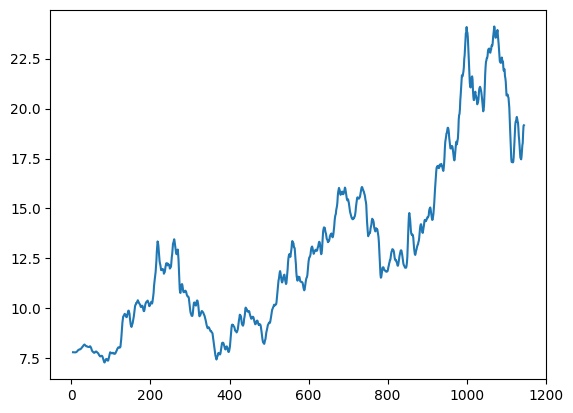

In [165]:
a = df1.收盘.rolling(window=5).mean()
import matplotlib.pyplot as plt
plt.plot(a)
plt.show()

<Axes: >

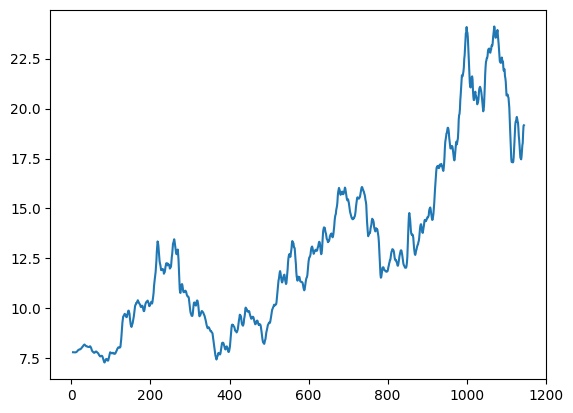

In [166]:
df1.收盘.rolling(window=5).mean().plot()

### 19 - 金融计算｜移动均值（可视化）

同时计算并绘制 df1 的收盘价、5日均线、20日均线

<Axes: xlabel='日期'>

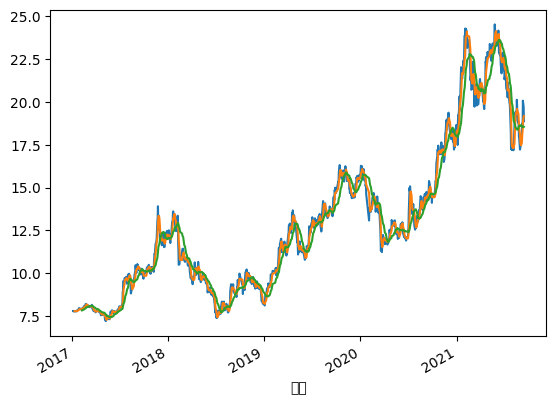

In [167]:
df1.set_index("日期")['收盘'].plot()
df1.set_index("日期")['收盘'].rolling(5).mean().plot()
df1.set_index("日期")['收盘'].rolling(20).mean().plot()

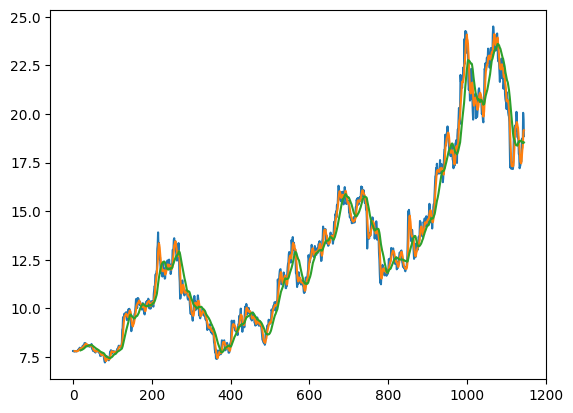

In [168]:
a = df1.收盘
b = df1.收盘.rolling(window=5).mean()
c = df1.收盘.rolling(window=20).mean()
import matplotlib.pyplot as plt
plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.show()

### 20 - 金融计算｜指数移动平均值（EMA）

根据 df1 计算 EMA20

In [169]:
df1['EMA20'] = df1['收盘'].ewm(span=20,min_periods=0,adjust=False,ignore_na=False).mean()
df1

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌_自定义,涨跌_自定义22,涨跌变化率,EMA20
0,2017-01-03,7.76,7.81,7.83,7.74,459840,4.205952e+08,1.16,0.77,0.06,0.31,0.00,NaN,nan%,7.810000
1,2017-01-04,7.80,7.81,7.83,7.79,449330,4.115034e+08,0.51,0.00,0.00,0.31,0.00,0.00,0.00%,7.810000
2,2017-01-05,7.82,7.82,7.83,7.80,344373,3.157697e+08,0.38,0.13,0.01,0.24,0.01,0.01,0.13%,7.810952
3,2017-01-06,7.82,7.78,7.82,7.76,358154,3.271764e+08,0.77,-0.51,-0.04,0.24,-0.04,-0.04,-0.51%,7.808005
4,2017-01-09,7.78,7.80,7.82,7.76,361082,3.299946e+08,0.77,0.26,0.02,0.21,0.02,0.02,0.26%,7.807242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2021-09-08,18.73,18.72,19.04,18.59,1026201,1.979771e+09,2.40,-0.05,-0.01,0.53,-0.01,-0.01,-0.05%,18.346297
1142,2021-09-09,18.60,18.49,18.64,18.29,739506,1.399536e+09,1.87,-1.23,-0.23,0.38,-0.23,-0.23,-1.23%,18.359983
1143,2021-09-10,18.38,20.06,20.26,18.33,2314945,4.668362e+09,10.44,8.49,1.57,1.19,1.57,1.57,8.49%,18.521889
1144,2021-09-13,19.85,19.70,20.00,19.30,1297228,2.606152e+09,3.49,-1.79,-0.36,0.67,-0.36,-0.36,-1.79%,18.634090


### 21 - 金融计算｜MACD

计算 df1 的 MACD 指标

In [170]:
exp1 = df1['收盘'].ewm(span=12, adjust=False).mean()
exp2 = df1['收盘'].ewm(span=26, adjust=False).mean()
df1['MACD'] = exp1 - exp2
df1['Signal line'] = df1['MACD'].ewm(span=9, adjust=False).mean()
df1

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌_自定义,涨跌_自定义22,涨跌变化率,EMA20,MACD,Signal line
0,2017-01-03,7.76,7.81,7.83,7.74,459840,4.205952e+08,1.16,0.77,0.06,0.31,0.00,NaN,nan%,7.810000,0.000000,0.000000
1,2017-01-04,7.80,7.81,7.83,7.79,449330,4.115034e+08,0.51,0.00,0.00,0.31,0.00,0.00,0.00%,7.810000,0.000000,0.000000
2,2017-01-05,7.82,7.82,7.83,7.80,344373,3.157697e+08,0.38,0.13,0.01,0.24,0.01,0.01,0.13%,7.810952,0.000798,0.000160
3,2017-01-06,7.82,7.78,7.82,7.76,358154,3.271764e+08,0.77,-0.51,-0.04,0.24,-0.04,-0.04,-0.51%,7.808005,-0.001777,-0.000228
4,2017-01-09,7.78,7.80,7.82,7.76,361082,3.299946e+08,0.77,0.26,0.02,0.21,0.02,0.02,0.26%,7.807242,-0.002179,-0.000618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2021-09-08,18.73,18.72,19.04,18.59,1026201,1.979771e+09,2.40,-0.05,-0.01,0.53,-0.01,-0.01,-0.05%,18.346297,-0.293684,-0.390503
1142,2021-09-09,18.60,18.49,18.64,18.29,739506,1.399536e+09,1.87,-1.23,-0.23,0.38,-0.23,-0.23,-1.23%,18.359983,-0.249129,-0.362229
1143,2021-09-10,18.38,20.06,20.26,18.33,2314945,4.668362e+09,10.44,8.49,1.57,1.19,1.57,1.57,8.49%,18.521889,-0.086141,-0.307011
1144,2021-09-13,19.85,19.70,20.00,19.30,1297228,2.606152e+09,3.49,-1.79,-0.36,0.67,-0.36,-0.36,-1.79%,18.634090,0.013821,-0.242845


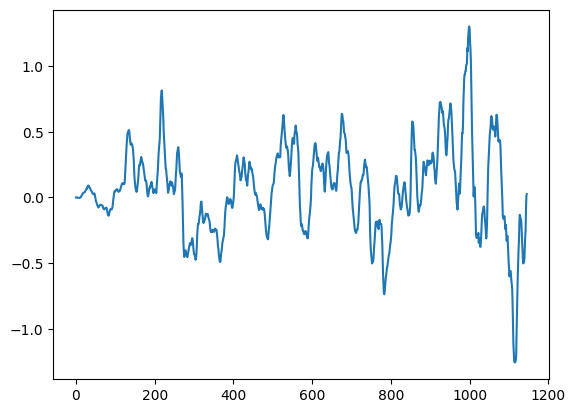

In [171]:
plt.plot(df1['MACD'])
plt.show()

### 22 - 金融计算｜布林指标

计算并绘制布林指标，计算方法参考[百度百科](https://baike.baidu.com/item/%E5%B8%83%E6%9E%97%E7%BA%BF%E6%8C%87%E6%A0%87/3325894?fromtitle=%E5%B8%83%E6%9E%97%E6%8C%87%E6%A0%87&fromid=258891&fr=aladdin)


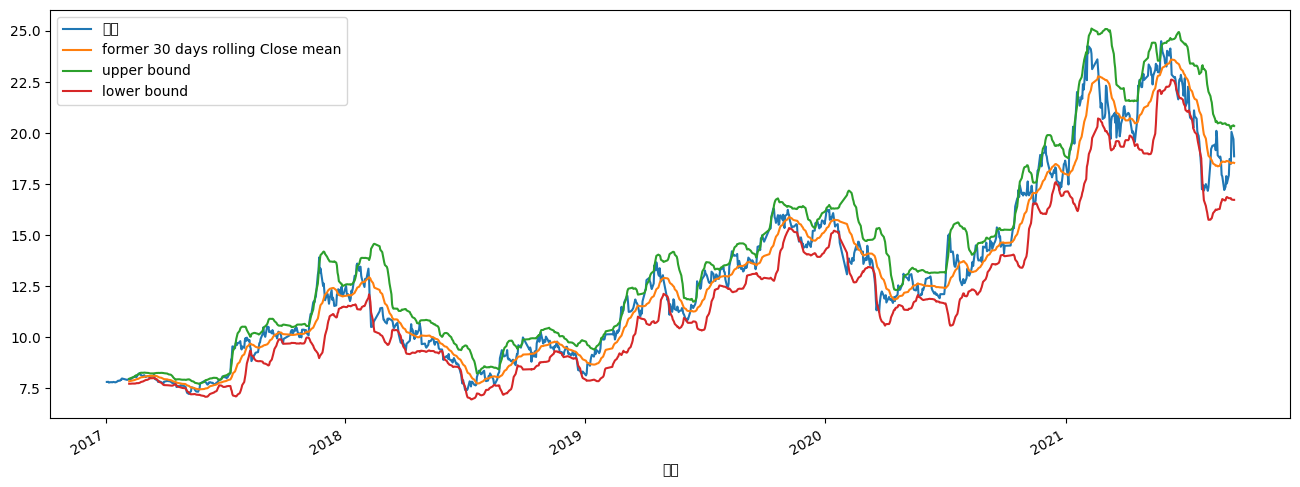

In [172]:
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.filterwarnings('ignore')
# pd.option.mode.chained_assignment = None



df1['former 30 days rolling Close mean'] = df1['收盘'].rolling(20).mean()
df1['upper bound'] = df1['former 30 days rolling Close mean'] + \
    2*df1['收盘'].rolling(20).std()  # 在这里我们取20天内的标准差
df1['lower bound'] = df1['former 30 days rolling Close mean'] - \
    2*df1['收盘'].rolling(20).std()

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Songti SC'] #设置中文，如果本句代码导致失效，可以点击https://mp.weixin.qq.com/s/WKOGvQP-6QUAP00ZXjhweg

df1.set_index("日期")[['收盘', 'former 30 days rolling Close mean','upper bound','lower bound' ]].plot(figsize=(16, 6))

plt.show()

### 23 - 日期移动｜值

将 df1 的索引设置为日期，将 df1 数据向后移动一天

In [173]:
df1.set_index('日期').shift(1)

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌_自定义,涨跌_自定义22,涨跌变化率,EMA20,MACD,Signal line,former 30 days rolling Close mean,upper bound,lower bound
日期,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,7.76,7.81,7.83,7.74,459840.0,4.205952e+08,1.16,0.77,0.06,0.31,0.00,NaN,nan%,7.810000,0.000000,0.000000,NaN,NaN,NaN
2017-01-05,7.80,7.81,7.83,7.79,449330.0,4.115034e+08,0.51,0.00,0.00,0.31,0.00,0.00,0.00%,7.810000,0.000000,0.000000,NaN,NaN,NaN
2017-01-06,7.82,7.82,7.83,7.80,344373.0,3.157697e+08,0.38,0.13,0.01,0.24,0.01,0.01,0.13%,7.810952,0.000798,0.000160,NaN,NaN,NaN
2017-01-09,7.82,7.78,7.82,7.76,358154.0,3.271764e+08,0.77,-0.51,-0.04,0.24,-0.04,-0.04,-0.51%,7.808005,-0.001777,-0.000228,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,18.09,18.73,19.05,17.84,1622344.0,3.067366e+09,6.74,4.40,0.79,0.84,0.79,0.79,4.40%,18.306960,-0.369698,-0.414708,18.5795,20.351284,16.807716
2021-09-09,18.73,18.72,19.04,18.59,1026201.0,1.979771e+09,2.40,-0.05,-0.01,0.53,-0.01,-0.01,-0.05%,18.346297,-0.293684,-0.390503,18.5505,20.291346,16.809654
2021-09-10,18.60,18.49,18.64,18.29,739506.0,1.399536e+09,1.87,-1.23,-0.23,0.38,-0.23,-0.23,-1.23%,18.359983,-0.249129,-0.362229,18.5060,20.202503,16.809497


### 24 - 日期移动｜索引

将 df1 的索引设置为日期，并将全部日期向后移动一天

In [174]:
import datetime
df1.set_index('日期').shift(freq=datetime.timedelta(1))

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌_自定义,涨跌_自定义22,涨跌变化率,EMA20,MACD,Signal line,former 30 days rolling Close mean,upper bound,lower bound
日期,,,,,,,,,,,,,,,,,,,
2017-01-04,7.76,7.81,7.83,7.74,459840,4.205952e+08,1.16,0.77,0.06,0.31,0.00,NaN,nan%,7.810000,0.000000,0.000000,NaN,NaN,NaN
2017-01-05,7.80,7.81,7.83,7.79,449330,4.115034e+08,0.51,0.00,0.00,0.31,0.00,0.00,0.00%,7.810000,0.000000,0.000000,NaN,NaN,NaN
2017-01-06,7.82,7.82,7.83,7.80,344373,3.157697e+08,0.38,0.13,0.01,0.24,0.01,0.01,0.13%,7.810952,0.000798,0.000160,NaN,NaN,NaN
2017-01-07,7.82,7.78,7.82,7.76,358154,3.271764e+08,0.77,-0.51,-0.04,0.24,-0.04,-0.04,-0.51%,7.808005,-0.001777,-0.000228,NaN,NaN,NaN
2017-01-10,7.78,7.80,7.82,7.76,361082,3.299946e+08,0.77,0.26,0.02,0.21,0.02,0.02,0.26%,7.807242,-0.002179,-0.000618,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,18.73,18.72,19.04,18.59,1026201,1.979771e+09,2.40,-0.05,-0.01,0.53,-0.01,-0.01,-0.05%,18.346297,-0.293684,-0.390503,18.5505,20.291346,16.809654
2021-09-10,18.60,18.49,18.64,18.29,739506,1.399536e+09,1.87,-1.23,-0.23,0.38,-0.23,-0.23,-1.23%,18.359983,-0.249129,-0.362229,18.5060,20.202503,16.809497
2021-09-11,18.38,20.06,20.26,18.33,2314945,4.668362e+09,10.44,8.49,1.57,1.19,1.57,1.57,8.49%,18.521889,-0.086141,-0.307011,18.5400,20.334670,16.745330


### 25 - 日期重采样｜日 -> 周

按周对 df1 进行重采样，保留每周最后一个数据

In [175]:
df1.set_index('日期').resample('W').last()


,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌_自定义,涨跌_自定义22,涨跌变化率,EMA20,MACD,Signal line,former 30 days rolling Close mean,upper bound,lower bound
日期,,,,,,,,,,,,,,,,,,,
2017-01-08,7.82,7.78,7.82,7.76,358154.0,3.271764e+08,0.77,-0.51,-0.04,0.24,-0.04,-0.04,-0.51%,7.808005,-0.001777,-0.000228,NaN,NaN,NaN
2017-01-15,7.79,7.81,7.84,7.77,434301.0,3.976019e+08,0.90,0.13,0.01,0.26,0.01,0.01,0.13%,7.805026,-0.002529,-0.002001,NaN,NaN,NaN
2017-01-22,7.82,7.87,7.88,7.82,393329.0,3.618652e+08,0.77,0.51,0.04,0.23,0.04,0.04,0.51%,7.813220,0.005576,-0.000237,NaN,NaN,NaN
2017-01-29,7.92,7.98,7.99,7.91,420713.0,3.918443e+08,1.01,0.88,0.07,0.25,0.07,0.07,0.88%,7.849773,0.029337,0.012089,NaN,NaN,NaN
2017-02-05,7.99,7.91,8.01,7.88,315472.0,2.926179e+08,1.63,-0.88,-0.07,0.19,-0.07,-0.07,-0.88%,7.855509,0.030296,0.015730,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-22,19.46,18.91,19.56,18.19,1614628.0,3.119153e+09,6.91,-4.64,-0.92,0.83,-0.92,-0.92,-4.64%,19.121205,-0.142627,-0.419982,18.3695,20.474246,16.264754
2021-08-29,18.05,17.88,18.37,17.80,728820.0,1.354409e+09,3.18,-0.39,-0.07,0.38,-0.07,-0.07,-0.39%,18.825072,-0.307851,-0.292708,18.6050,20.442578,16.767422
2021-09-05,17.99,17.53,17.99,17.19,1394819.0,2.523273e+09,4.47,-2.01,-0.36,0.72,-0.36,-0.36,-2.01%,18.296369,-0.493470,-0.416861,18.6345,20.401466,16.867534


### 26 - 日期重采样｜日 -> 月

按月对 df1 进行重采样，保留每月最后一个数据

In [176]:
df1.set_index('日期').resample('M').last()


,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌_自定义,涨跌_自定义22,涨跌变化率,EMA20,MACD,Signal line,former 30 days rolling Close mean,upper bound,lower bound
日期,,,,,,,,,,,,,,,,,,,
2017-01-31,7.92,7.98,7.99,7.91,420713,3.918443e+08,1.01,0.88,0.07,0.25,0.07,0.07,0.88%,7.849773,0.029337,0.012089,NaN,NaN,NaN
2017-02-28,8.08,8.13,8.16,8.07,369720,3.503669e+08,1.11,0.62,0.05,0.22,0.05,0.05,0.62%,8.063112,0.074404,0.075472,8.0565,8.263460,7.849540
2017-03-31,7.73,7.82,7.83,7.73,633121,5.785790e+08,1.29,1.16,0.09,0.37,0.09,0.09,1.16%,7.903994,-0.073842,-0.049755,7.9475,8.238768,7.656232
2017-04-30,7.61,7.64,7.64,7.57,286446,2.561067e+08,0.92,0.26,0.02,0.17,0.02,0.02,0.26%,7.708865,-0.078102,-0.079294,7.7170,7.918896,7.515104
2017-05-31,7.75,7.85,7.88,7.71,1033211,9.487419e+08,2.19,1.29,0.10,0.61,0.10,0.10,1.29%,7.546467,0.011297,-0.052053,7.4635,7.804907,7.122093
2017-06-30,8.05,8.04,8.08,7.96,499633,4.680035e+08,1.49,-0.50,-0.04,0.30,-0.04,-0.04,-0.50%,7.858898,0.107020,0.081328,7.8330,8.102198,7.563802
2017-07-31,9.61,9.48,9.63,9.26,1575864,1.671814e+09,3.87,-0.73,-0.07,0.93,-0.07,-0.07,-0.73%,9.198929,0.401497,0.434813,9.1590,10.512139,7.805861
2017-08-31,10.20,10.09,10.25,9.96,1151786,1.297731e+09,2.83,-1.46,-0.15,0.68,-0.15,-0.15,-1.46%,9.714083,0.250813,0.182339,9.6150,10.520480,8.709520
2017-09-30,9.73,9.92,9.97,9.67,682280,7.538525e+08,3.10,2.37,0.23,0.40,0.23,0.23,2.37%,10.002902,0.007831,0.083505,10.1490,10.618575,9.679425


### 27 - 日期重采样｜分钟 -> 日

按日对 df2 进行重采样，保留每天最后一个数据

In [177]:
df2.set_index('时间').resample('D').last()


,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
时间,,,,,,,,,,
2021-08-03,17.92,17.89,17.94,17.89,-0.22,-0.04,20126.0,36034747.0,0.28,0.01
2021-08-04,17.81,17.81,17.82,17.80,0.00,0.00,12422.0,22122442.0,0.11,0.01
2021-08-05,17.64,17.68,17.68,17.64,0.17,0.03,15602.0,27568733.0,0.23,0.01
2021-08-06,17.84,17.86,17.87,17.84,0.06,0.01,13251.0,23647402.0,0.17,0.01
2021-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-09,19.07,19.06,19.09,19.06,-0.16,-0.03,16831.0,32092450.0,0.16,0.01
2021-08-10,19.72,19.73,19.74,19.70,0.05,0.01,14968.0,29523092.0,0.20,0.01
2021-08-11,19.74,19.81,19.81,19.74,0.35,0.07,17181.0,34015140.0,0.35,0.01


微信搜索公众号「早起Python」，关注后可以获得更多资源！

### 28 - 日期重采样｜低频 -> 高频

将 df2 的 5分钟 数据改为 3分钟，缺失数据向前填充

In [178]:
df_3min = df2.set_index('时间').resample('3min').last()
df_3min.ffill()

,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
时间,,,,,,,,,,
2021-08-03 09:33:00,17.99,17.78,18.02,17.75,-1.28,-0.23,52807.0,94339287.0,1.50,0.03
2021-08-03 09:36:00,17.99,17.78,18.02,17.75,-1.28,-0.23,52807.0,94339287.0,1.50,0.03
2021-08-03 09:39:00,17.77,17.76,17.83,17.66,-0.11,-0.02,41508.0,73683531.0,0.96,0.02
2021-08-03 09:42:00,17.77,17.76,17.83,17.66,-0.11,-0.02,41508.0,73683531.0,0.96,0.02
2021-08-03 09:45:00,17.77,17.77,17.83,17.73,0.06,0.01,18521.0,32915794.0,0.56,0.01
...,...,...,...,...,...,...,...,...,...,...
2021-09-13 14:48:00,20.22,20.21,20.26,20.18,0.00,0.00,24419.0,49373556.0,0.40,0.01
2021-09-13 14:51:00,20.22,20.21,20.26,20.18,0.00,0.00,24419.0,49373556.0,0.40,0.01
2021-09-13 14:54:00,20.21,20.20,20.23,20.19,-0.05,-0.01,20769.0,41974013.0,0.20,0.01


In [179]:
df2

,时间,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
0,2021-08-03 09:35:00,17.99,17.78,18.02,17.75,-1.28,-0.23,52807,94339287,1.50,0.03
1,2021-08-03 09:40:00,17.77,17.76,17.83,17.66,-0.11,-0.02,41508,73683531,0.96,0.02
2,2021-08-03 09:45:00,17.77,17.77,17.83,17.73,0.06,0.01,18521,32915794,0.56,0.01
3,2021-08-03 09:50:00,17.77,17.72,17.78,17.70,-0.28,-0.05,24424,43323693,0.45,0.01
4,2021-08-03 09:55:00,17.71,17.77,17.78,17.70,0.28,0.05,23197,41110937,0.45,0.01
...,...,...,...,...,...,...,...,...,...,...,...
1435,2021-09-13 14:40:00,20.15,20.17,20.21,20.13,0.05,0.01,16093,32451916,0.40,0.01
1436,2021-09-13 14:45:00,20.18,20.21,20.21,20.13,0.20,0.04,16191,32677812,0.40,0.01
1437,2021-09-13 14:50:00,20.22,20.21,20.26,20.18,0.00,0.00,24419,49373556,0.40,0.01
1438,2021-09-13 14:55:00,20.21,20.20,20.23,20.19,-0.05,-0.01,20769,41974013,0.20,0.01


## 8-3 K线图

<br>

**<font color = '#5172F0'><font size=3.5>必读👇👇👇**</font>

在 Python 中绘制k线图有很多方法，例如可以直接用 matplotlib 进行绘制。

本习题将基于一个简单易上手的库 `mplfinance` 进行展开。

如果未安装 mplfinance 需要先执行下面的代码进行安装！

In [180]:
! pip install mplfinance

安装后执行下面的代码导入

In [181]:
import mplfinance as mpf

使用 mplfinance 有固定的格式!

数据必须是`Pandas DataFrame`格式，必须包含开盘价、最高价、最低价和收盘价，需要使用`DatetimeIndex`作为索引

为了方便大家练习，第一个K线图我将引导大家制作！

首先就是将数据处理为它指定的形状👇

### 29 - 数据处理｜选择列

<br>

筛选 `df1` 中`'日期','开盘','最高','最低','收盘','成交量'`几列，并命名为新数据框 `df_new`

In [182]:
df_new = df1[['日期','开盘','最高','最低','收盘','成交量']]
df_new

,日期,开盘,最高,最低,收盘,成交量
0,2017-01-03,7.76,7.83,7.74,7.81,459840
1,2017-01-04,7.80,7.83,7.79,7.81,449330
2,2017-01-05,7.82,7.83,7.80,7.82,344373
3,2017-01-06,7.82,7.82,7.76,7.78,358154
4,2017-01-09,7.78,7.82,7.76,7.80,361082
...,...,...,...,...,...,...
1141,2021-09-08,18.73,19.04,18.59,18.72,1026201
1142,2021-09-09,18.60,18.64,18.29,18.49,739506
1143,2021-09-10,18.38,20.26,18.33,20.06,2314945
1144,2021-09-13,19.85,20.00,19.30,19.70,1297228


### 30 - 数据处理｜修改列名

<br>

将 df_new 的列名修改为 `'Date','Open','High','Low','Close','Volume'`

In [183]:
df_new.rename(columns={'日期':'Date','开盘':'Open','最高':'High','最低':'Low','收盘':'Close','成交量':'Volume'}, inplace=True)
df_new

,Date,Open,High,Low,Close,Volume
0,2017-01-03,7.76,7.83,7.74,7.81,459840
1,2017-01-04,7.80,7.83,7.79,7.81,449330
2,2017-01-05,7.82,7.83,7.80,7.82,344373
3,2017-01-06,7.82,7.82,7.76,7.78,358154
4,2017-01-09,7.78,7.82,7.76,7.80,361082
...,...,...,...,...,...,...
1141,2021-09-08,18.73,19.04,18.59,18.72,1026201
1142,2021-09-09,18.60,18.64,18.29,18.49,739506
1143,2021-09-10,18.38,20.26,18.33,20.06,2314945
1144,2021-09-13,19.85,20.00,19.30,19.70,1297228


### 31 - 数据处理｜修改索引

<br>

将 df_new 的索引列修改为 Date 列

In [184]:
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1146 non-null   datetime64[ns]
 1   Open    1146 non-null   float64       
 2   High    1146 non-null   float64       
 3   Low     1146 non-null   float64       
 4   Close   1146 non-null   float64       
 5   Volume  1146 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 53.8 KB


In [188]:
# df_new.set_index('Date')
df_new.index = pd.DatetimeIndex(df_new['Date'])


### 32 - 制作K线图｜日线

根据 df_new 绘制日线级K线

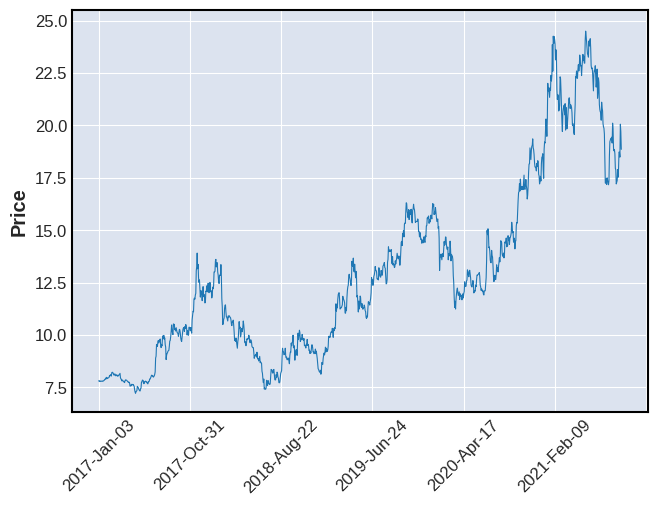

In [189]:
mpf.plot(df_new, type='line')


### 33 - 制作K线图｜添加移动均线

在上一题的基础上，添加5日、10日、15日移动均线

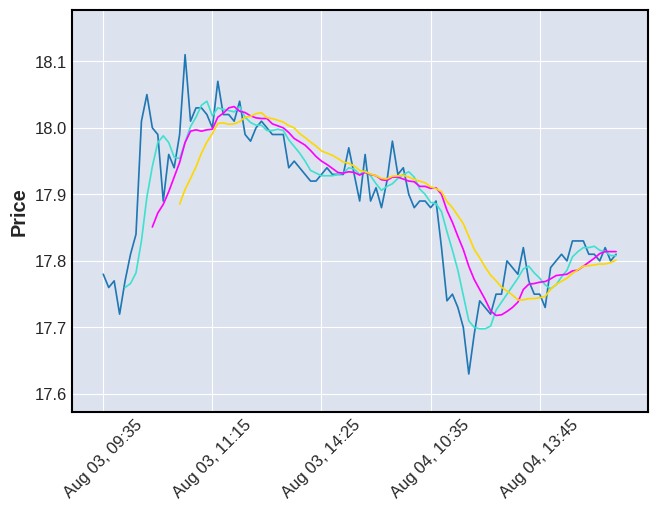

In [194]:
mpf.plot(df_new, type='line',mav=(5,10,15))


### 34 - 制作K线图｜添加成交量

在上一题的基础上，添加成交量

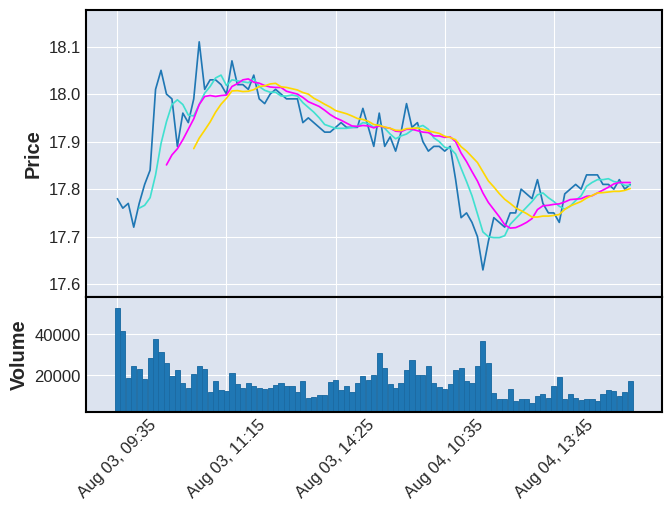

In [196]:
mpf.plot(df_new, type='line',mav=(5,10,15), volume=True)


### 35 - 制作K线图｜周线

对 df1 进行重采样，制作周线级K线

### 36 - 制作K线图｜蜡烛图

使用 df2 数据，筛选出 8月3日 的数据，制作蜡烛图

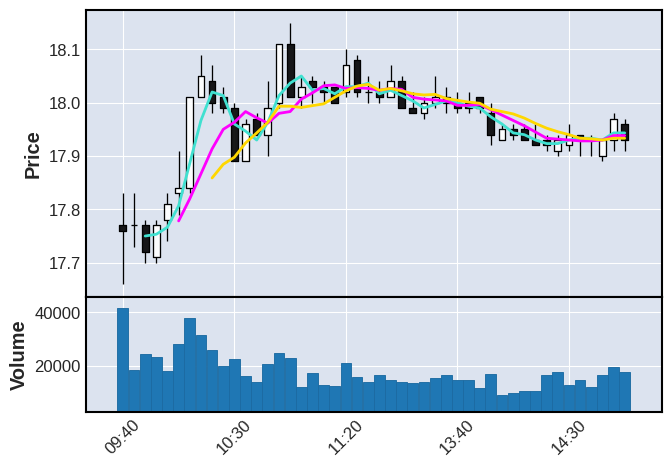

In [192]:
df_new = df2[(df2['时间'] > '2021-08-03 09:35:00') & (df2['时间'] < '2021-08-03 15:00:00')]
df_new = df_new[['时间','开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Date','Open','High','Low','Close','Volume']
df_new.set_index(["Date"], inplace=True)

mpf.plot(df_new, type='candle',mav=(3,6,9), volume=True)

### 37 - 制作K线图｜展示非交易时间

<br>

使用 df2 数据，筛选 8月3日-8月4日的数据，制作蜡烛图并展示非交易时间区间

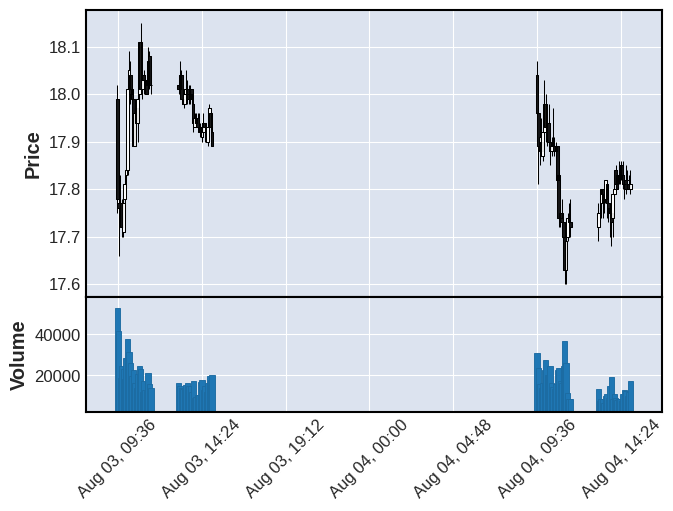

In [193]:
df_new = df2[(df2['时间'] > '2021-08-03 9:00:00') & (df2['时间'] < '2021-08-04 15:00:00')]
df_new = df_new[['时间','开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Date','Open','High','Low','Close','Volume']
df_new.set_index(["Date"], inplace=True)
mpf.plot(df_new,type='candle',show_nontrading=True, volume=True)

![](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2021/09/16/16317972442543.jpg?域名/sample.jpg?x-oss-process=style/stylename)